In [25]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

from IPython.display import Image, IFrame, YouTubeVideo

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [26]:
%%html
<link href="https://fonts.googleapis.com/css2?family=Montserrat:ital,wght@0,300;0,400;1,300;1,400&display=swap" rel="stylesheet"> <style>
.reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6 {
    font-family: 'Montserrat', sans-serif;
    font-weight: normal !important;
}
.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6{
    font-weight: normal !important;
    
}
.jupyter-widgets  {
    font-family: 'Montserrat', sans-serif !important;
}

.present {
    top: 0px;
}
</style>   

<script>
Reveal.addEventListener('fragmentshown', function(event) {
   document.getElementById("postfragment").style.color="red !important"; 
});
</script>

<img src="static/images/FCT_bilingüe_postivo_alta.jpg" alt="Zientzia eta Teknologia Fakultatea" width="400">

<center><h1 style="margin: 0 0 0 0;">MinervaLab</h1></center>

<hr style="border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<center><h4>Jupyter Notebook-etan oinarritutako irakaskuntza-proiektu alternatiboa</h4></center>

<center>
    <h4 style="margin: 80px 0 0 0;"><i style="opacity: 0.5;margin: 0 30px 0 0;">Egilea:</i> Jon Gabirondo López</h4>
    <h4 style="margin: 40px 0 0 0;"><i style="opacity: 0.5;margin: 0 30px 0 0;">Zuzendaria:</i> Josu M. Igartua</h4>
</center>

In [27]:
def galdera_histograma(galdera, prozesatutako_erantzunak):
    
    bai = 0
    ez = 0
    biak = 0

    jasotako_er = 0
    
    for erantzuna in prozesatutako_erantzunak:
        e = erantzuna.get(galdera)
        if e != '':
            if e == 'Bai':
                bai =  bai + 1
            elif e == 'Ez':
                ez =  ez + 1
            elif e == 'Biak':
                biak =  biak + 1
                
            jasotako_er = jasotako_er + 1
            
    return {'Bai': bai, 'Ez': ez, 'Biak': biak}, jasotako_er, {'Bai': bai/jasotako_er, 'Ez': ez/jasotako_er, 'Biak': biak/jasotako_er} 

In [28]:
galdera_guztiak = [
    'Tresnak nire atentzioa deitu du',
    'Normalean baino gehiago atenditu dut',
    'Ez zait batere gustatu',
    'Klase emateko modu aproposa iruditzen zait',
    'Horrelako klase gehiago jasoko nituzke',
    'Proiektua interesatu zait',
    'Hainbat iruzkin/gomendio emango nituzke',
    'Guztiz galdu naiz',
    'Nahiago dut klaseak emateko modu "tradizionala"',
    'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit',
    'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait',
    'Horrelako proiektuetan parte hartuko nuke',
    'Ez dut ezer ulertu',
    'Nire lehenengo konbokatoria da',
    'Aurreko urteetan baino hobeto ulertu dut',
    'Nahiago dut aurreko urteetako metodologia',
]

In [29]:
inkestak_emaitzak = [{'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Bai',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': 'Grafikoak eta hauek erabiltzeko erraztasuna ona da baina ez zait erraza iruditu programetara iristeko era.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Bai',
  'Klase emateko modu aproposa iruditzen zait': '',
  'Horrelako klase gehiago jasoko nituzke': '',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': '',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': 'Klasea emateko modu aproposa iruditzen zait, baina modu hau eta tradizionala konbinatuko nituzke.'},
 {'Tresnak nire atentzioa deitu du': 'Ez',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Ez',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Biak',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': 'Sentikortasun handiko tarteetan aldaketa txikiak egiteko trasnaren bat jarriko nuke. Aurkezpenak egiteko grafikoak handiagoak izatea komeni da. Lerro ezberdinetarako kolore gehiago izatea aproposa litzateke.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': '',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': '',
  'Horrelako proiektuetan parte hartuko nuke': '',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': 'Bai',
  'Nahiago dut aurreko urteetako metodologia': 'Ez',
  'Nota': 10,
  'Iruzkina': 'Klasean proiektatzeko txikiegiak dira irudiak, grafiko bakoitzak pantaila osoa okupatu beharko luke ondo ikusteko.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': 'Bai',
  'Nahiago dut aurreko urteetako metodologia': 'Ez',
  'Nota': 10,
  'Iruzkina': 'Interesgarria izango litzateke fase trantsizio jarraiak (p(T) diagraman) bukaeran erakutsi duzuen likido/gas blokeen eran ikustea'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 9,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Ez',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 9,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Bai',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 10,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 10,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 7.5,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': '',
  'Normalean baino gehiago atenditu dut': '',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': '',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': 'Bai',
  'Nahiago dut aurreko urteetako metodologia': 'Ez',
  'Nota': 7,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Bai',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 7.5,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Ez',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Bai',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': 'Bai',
  'Nahiago dut aurreko urteetako metodologia': 'Bai',
  'Nota': 6,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Ez',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Ez',
  'Horrelako klase gehiago jasoko nituzke': 'Ez',
  'Proiektua interesatu zait': 'Ez',
  'Hainbat iruzkin/gomendio emango nituzke': '',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Bai',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': '',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 4,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Bai',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': 'Bai',
  'Nahiago dut aurreko urteetako metodologia': 'Ez',
  'Nota': 8,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Bai',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 7,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Biak',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 7,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': 'Ondo egon da. Interesantea izan da eta gai honeri buruz gehiago ulertu dut, oso modu txukunean dago adierazita.'},
 {'Tresnak nire atentzioa deitu du': 'Ez',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Bai',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 6,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Ez',
  'Horrelako klase gehiago jasoko nituzke': 'Ez',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Bai',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': 'Ez',
  'Nahiago dut aurreko urteetako metodologia': 'Bai',
  'Nota': None,
  'Iruzkina': 'GrALerako proiektu moduan interesgarria iruditu zait. Baina klasean erabiltzeko ez zait erabilgarria iruditu.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Ez',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Nota': None,
  'Iruzkina': 'Hasierako azalpen bezala egokiagoa iruditzen zait metodo tradizionalaren bidez sarrera egitea, eta behin kontzeptuak ulertuta, sakontzeko modu oso interesgarri eta erabilgarria iruditzen zait tresna.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Ez',
  'Aurreko urteetan baino hobeto ulertu dut': '',
  'Nahiago dut aurreko urteetako metodologia': 'Ez',
  'Nota': 9.5,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 9,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Ez',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Biak',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': None,
  'Iruzkina': 'Proiektoretik txikiegiak ikusten ziren zenbakiak etab. Potentzial kimikoarena eta, batez ere, azkenenko fase trantsizioa era jarraituan ulertzeko oso erabilgarriak iruditu zaizkit. (Oso aproposa iruditzen zait gauzak ulertzeko baina aurreko klaseetan emandakoaren osagarri moduan, bagenekiena gehiago finkatzeko)'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 9.8,
  'Iruzkina': 'Prozesuak grafikoki irudikatzea oso erabilgarria da ikasteko orduan, termoko atala askotan gertatzen den moduan. Askotan zaila egin zait grafikoak ulertzea eta tresna interaktibo hau beharrezkoa ikusten dut. Ez dakit lan handia izango litzatekeen baina ondo legoke 3. dimentsioarekin jolastea. Lan ederra!!'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Bai',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8.5,
  'Iruzkina': 'Oso erabilgarria iruditzen zait klasean teoria ematn den bitartean programa hauek erabiltzea. Tradizionalki klaseak ematea ondo dago, baina goizeko lehenengo orduan atentzioa deitzeko (esnatzeko) programa ona.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8.1,
  'Iruzkina': 'Diseinua ondo dao. Agian letrak handixeago hobe, urrunetik zaila baita irakurtzea. Gauza asko ez ditut ulertu, baina ez da tresna digitalagatik, baizik eta termoko kontzeptuak ez ditudalako menperatzen. Gehiago disfrutatuko nuke gaiak ikasi eta ulertu ostean. Hala ere, diagrama batzuek bai lagundu didate aste honetan teoria klaseetan emandakoa barneratzen. Termo ikasten seriotan hasten naizenean, begiratu bat emango diot programa honi, benetan uste dudalako ideia oso ona dela eta lagungarria izan ahal zaidala.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': '',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Ez',
  'Ez dut ezer ulertu': 'Biak',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 8,
  'Iruzkina': 'Oso modu egokia iruditu zait gauzak azaltzeko, gainera, ez dut izatez termo asko ulertzen baina uste dut honekin hobeto ulertuko nukeela'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Bai',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Ez',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Bai',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Bai',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Bai',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': None,
  'Iruzkina': ''},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Ez',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Ez',
  'Proiektua interesatu zait': 'Biak',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Bai',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Biak',
  'Horrelako proiektuetan parte hartuko nuke': 'Bai',
  'Ez dut ezer ulertu': 'Biak',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 7,
  'Iruzkina': 'Interesgarria iruditu zait proiektua baina erabiltzeko zaila iruditzen zait eta ez dakit guztiz ondo ikusi ditudan kontzeptuak. Batez ere, nire ustez hoberen ulertu den partea amairekoa izan da. Hala ere, ez ulertzearen errua nirea izan dela uste uste dut.'},
 {'Tresnak nire atentzioa deitu du': 'Bai',
  'Normalean baino gehiago atenditu dut': 'Biak',
  'Ez zait batere gustatu': 'Ez',
  'Klase emateko modu aproposa iruditzen zait': 'Bai',
  'Horrelako klase gehiago jasoko nituzke': 'Bai',
  'Proiektua interesatu zait': 'Biak',
  'Hainbat iruzkin/gomendio emango nituzke': 'Ez',
  'Guztiz galdu naiz': 'Ez',
  'Nahiago dut klaseak emateko modu "tradizionala"': 'Ez',
  'Tresna erabiltzeak klasea jarraitzeko zailtasunak sortu dizkit': 'Ez',
  'Diseinuaren aldetik oso baldarra eta itsusia iruditu zait': 'Ez',
  'Horrelako proiektuetan parte hartuko nuke': 'Biak',
  'Ez dut ezer ulertu': 'Ez',
  'Nire lehenengo konbokatoria da': 'Bai',
  'Nota': 7.5,
  'Iruzkina': 'Nahiko interesantea iruditu zait eta ikasgaiaren atal hau hobeto ulertzeko baliagarria da. Beharbada termodinamikarekiko interes handiagoa duen norbaiti gehiago gustatuko litzaioke.'}]

In [30]:
#gald_1 = 'Tresnak nire atentzioa deitu du'
#gald_2 = 'Nahiago dut klaseak emateko modu "tradizionala"'

#galderak = [gald_1, gald_2]

galderak = galdera_guztiak

galde_hist_totala = []
gald_hist_eskalatuta_totala = []
kop_totala = []

for galdera in galderak:

    gald_hist, kop, gald_hist_eskalatuta = galdera_histograma(galdera, inkestak_emaitzak)
    
    galde_hist_totala.append(gald_hist)
    gald_hist_eskalatuta_totala.append(gald_hist_eskalatuta)
    kop_totala.append(kop)
        
inkestak_block = widgets.VBox(
    [],
    layout=widgets.Layout(width='100%')
)

grafikak = widgets.HBox(
    [],
    layout=widgets.Layout(
        width='100%',
        align_self = 'center',
        align_items = 'center'
    )
)

sc_ord = bqs.OrdinalScale()
sc_y = bqs.LinearScale()
sc_y_2 = bqs.LinearScale()

bar_chart = bqm.Bars(
    x=['Bai', 'Ez', 'Biak'],
    y=[],
    scales={'x': sc_ord, 'y': sc_y},
    labels=['Bai', 'Ez', 'Biak'],
    colors = ['#828282','#ffdd87','#bdbdbd'],
    #opacities = [0.5, 0.5, 0.75]
)

bar_chart_eskalatuta = bqm.Bars(
    x=['Bai', 'Ez', 'Biak'],
    y=[],
    scales={'x': sc_ord, 'y': sc_y_2},
    labels=['Bai', 'Ez', 'Biak'],
)

ord_ax = Axis(
    label='Erantzunak',
    scale=sc_ord,
    grid_lines='none'
)

y_ax = Axis(
    label='Kopurua ',
    scale=sc_y,
    orientation='vertical',
    grid_lines='solid'
)

y_ax_2 = Axis(
    label='Kopurua (%)',
    scale=sc_y_2,
    orientation='vertical',
    grid_lines='solid'
)

figura_emaitzak = bq.Figure(
    title= '',
    axes=[ord_ax, y_ax],
    marks=[bar_chart],
    animation_duration = 500,
    fig_margin=dict(top=10, bottom=60, left=80, right=30),
)

figura_eskalatuta = bq.Figure(
    title= '',
    axes=[ord_ax, y_ax_2],
    marks=[bar_chart_eskalatuta],
    animation_duration = 500,
    fig_margin=dict(top=10, bottom=60, left=80, right=30),
)


grafikak.children = [
    figura_emaitzak,
    figura_eskalatuta
]

In [31]:
def aldatu_galdera(change):
    
    index = change.owner.index
    
    galdera = galderak[index]
    
    galdera_html.value = "<h2>"+galdera+"</h2>"
    
    bai = galde_hist_totala[index].get('Bai')
    ez = galde_hist_totala[index].get('Ez')
    biak = galde_hist_totala[index].get('Biak')
    
    bar_chart.y = [
        bai,
        ez,
        biak
    ]
    
    kop = kop_totala[index]
    
    bar_chart_eskalatuta.y = [
        bai/33*100,
        ez/33*100,
        biak/33*100
    ]

In [32]:
galdera_html = widgets.HTML(
    value = "<h4></h4>",
    layout = widgets.Layout(
        align_self = 'center'
    )
)

galdera_aldatu_dropdown = widgets.Dropdown(
    options=galdera_guztiak,
    value=galderak[1],
    description='Galdera:',
    disabled=False,
    layout = widgets.Layout(
        width = '70%',
        align_self = 'center'
    )
)

galdera_aldatu_dropdown.observe(aldatu_galdera, 'value')

inkestak_block.children = [
    galdera_html,
    grafikak,
    galdera_aldatu_dropdown
]

galdera_aldatu_dropdown.value = galderak[0]

<h2>Helburu nagusiak</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

<h2>Helburu nagusiak</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

<ul>
    <li>
    <h4 style="line-height: 2.0">Elkarrekintzan oinarritutako irakaskuntza-proiektua garatzea, ikasleen parte-hartzea eta autonomia bultzatuko dituena.</h4>
    </li>
    <li>
    <h4 style="line-height: 2.0">Irakaskuntza-materiala sortzeko tresna eta lan-fluxuak aztertzea.</h4>
    </li>
</ul>

<ul>
    <li>
    <h4 style="margin-top: 0;line-height: 2.0;color: rgba(0,0,0,0.5)"><span style="color: black">Elkarrekintzan</span> oinarritutako <span style="color: black">irakaskuntza-proiektua</span> garatzea, ikasleen <span style="color: black">parte-hartzea</span> eta <span style="color: black">autonomia</span> bultzatuko dituena.</h4>
    </li>
</ul>

<ul>
    <li>
    <h4 style="margin-top: 0;line-height: 2.0;color: rgba(0,0,0,0.5)"><span style="color: black">Irakaskuntza-materiala sortzeko</span> eta <span style="color: black">argitaratzeko tresna</span> eta <span style="color: black">lan-fluxuak</span> aztertzea.</h4>
    </li>
</ul>

<center>
<img src="static/images/histograma.png"
     alt="histograma"
     style="border: 3px solid rgba(255, 190, 25, .5); border-radius: 3px;" />
<h4>1. figura: Bi taldeen noten histograma. REF</h4>
</center>

<h2>Metodologia</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">


<div style="width: 50%; border-right: 3px solid rgba(255, 190, 25, .5); padding: 0 0 0 0; float: left">
<h4>1. Materialaren inguruko gogoeta</h4>
<h4>2. Tresnen inguruko azterketa</h4>
<br>
</div>
<div style="position: absolute; top: 50%; transform: translateY(-50%); width: 50%; margin-left:60%;">
<h4>3. MinervaLab garatu</h4>
    <br>
</div>

<div style="text-align:center">
    <h4>1. Materialaren inguruko gogoeta</h4>
</div>

<div style="text-align:center">
    <h4>2. Tresnen inguruko azterketa</h4>
</div>

<div style="text-align:center">
    <h4>3. MinervaLab garatu</h4>
</div>

<h2>Edukia: lehenengo hausnarketa</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

<div style="text-align: center" id="postfragment">
    <h4>Iraunkorra</h4>
</div>

<div style="text-align: center">
    <h4 id="postfragment">Errepikagarria</h4>
</div>

<div style="text-align: center">
    <h4 id="postfragment">Hedapen-eremuari eta hartzaileari egokitua</h4>
</div>

<div style="text-align: center">
    <h4 id="postfragment">Identifikagarria</h4>
</div>

<h2>Edukia: bigarren hausnarketa</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

<div style="text-align: right; border-right: 3px solid rgba(255, 190, 25, .5); padding-right: 30px;">
    <h4 style="color:rgba(0,0,0,0.5)">Iraunkorra</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Errepikagarria</h4>
    <h4 style="line-height:1.5;color:rgba(0,0,0,0.5)">Hedapen-eremuari eta hartzaileari egokitua</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Identifikagarria</h4>
</div>

<div style="text-align: left; padding-right: 30px;">
    <h4>Irakasle eta ikasleentzat editagarria</h4>
    <h4>Egindako aldaketak eskuragarri</h4>
    <h4 style="line-height:1.5">Eskola eman eta etxean erabiltzeko modukoak</h4>
    <h4 style="line-height:1.5">Erabilitako bertsioa aipatu</h4>
</div>

In [33]:
def integrazioa_irudia_aldatu(change):
    
    if change.owner.value:

        for i in range(len(buttons)):

            if buttons[i] is change.owner:
                
                    integrazioa_image.value = '<img src="' + integrazioa_irudiak[i] + '">'
            else:
                
                buttons[i].value = False
                
    else:
        
        if True not in [button.value for button in buttons]:
            
            integrazioa_image.value = '<img src="static/images/integrazioa.png">'

In [34]:
integrazioa_box = widgets.HBox(
    [],
    layout = widgets.Layout(
        align_items = 'center'
    )
)

integrazioa_image = widgets.HTML(
    value = '<img src="static/images/integrazioa.png">',
    layout = widgets.Layout(
        width='65%'
    )
)

integrazioa_buttons = widgets.VBox(
    layout = widgets.Layout(
        width='35%',
        align_self = 'center',
        align_items = 'center'
    )
)

ezaugarriak = [
    'Iraunkortasuna',
    'Errepikagarritasuna',
    'Egokitasuna',
    'Identifikagarritasuna'
]

buttons = []

for ezaug in ezaugarriak:
    
    b = widgets.ToggleButton(
            value=True,
            description=ezaug,
            disabled=False,
            button_style='',
            tooltip='',
            icon='',
            layout = widgets.Layout(
                width = '200px',
                margin = '10px 0 10px 0',
            )
        )
    
    b.observe(integrazioa_irudia_aldatu, 'value')
    
    buttons.append(b)

for button in buttons:
    button.value = False
    
integrazioa_irudiak = [
    './static/images/iraunkortasuna.png',
    './static/images/errepikakortasuna.png',
    './static/images/egokitasuna.png',
    './static/images/identifikagarritasuna.png',
]    
    
integrazioa_buttons.children = buttons

integrazioa_box.children = [
    integrazioa_image,
    integrazioa_buttons
]

<h2>Edukia: erabilitako tresnak</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

In [35]:
integrazioa_box

<center>
    <img src="static/images/jupyter.png">
</center>

# Jupyter Notebook
--------------------

### Markdown lengoaian dago idatzia testu hau. LaTeX-eko ekuazio bat ikus daiteke jarraian:

\begin{equation}
pV = nRT
\end{equation}

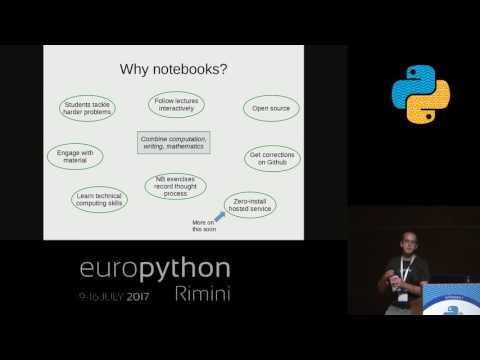

In [53]:
YouTubeVideo(id="S7uUEwICDcc", width='1200px', height='600px')

In [37]:
def f(w, k):
    plt.figure(2, dpi=150)
    t = np.linspace(0, 10, num=500)
    plt.plot(t, np.sin(w*t + k))
    plt.ylim(-2, 2)
    plt.show()

interactive_plot = widgets.interactive(f, w=(0, 10, 1), k=(-1, 1, 0.1))
interactive_plot.layout.align_items = 'center'
interactive_plot

interactive(children=(IntSlider(value=5, description='w', max=10), FloatSlider(value=0.0, description='k', max…

<h2>Edukia</h2>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

![minervalab-logo](static/images/logo.png)

<h3>Aplikazioak</h3>
<hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">

In [38]:
taula = pd.DataFrame()

pd.set_option('display.latex.repr', True)
pd.set_option('display.max_colwidth', 200)
pd.set_option('colheader_justify','left')

taula['Kodea'] = [
    '111-000',
    '112-000',
    '113-000',
    '114-000',
    '115-000',
    '116-000',
    '117-000',
    '118-000',
    '119-000',
    '11A-000',
    '11B-000',
    '11C-000',
    '11D-000',
]

taula['Landutako kontzeptua'] = [
    'Jariakin baten $p(v, T)$ lerro isotermoen bi dimentsioko azterketa (aldagai laburtutan).',
    'Fase-trantsizioen ondoriozko bolumen molarraren aldakuntza.',
    'Zenbait elementu eta konposatuen puntu kritikoen kokapena.',
    'Van der Waals-en parametroek lerro isotermoen itxuran duten eragina eta horren esangura fisikoa.',
    'Zenbait elementu eta konposatuen lerro isotermoen itxura.',
    'Jariakin baten $p(v, T)$ lerro isotermooen hiru dimentsioko azterketa (aldagai laburtutan).',
    'Lerro isotermoetan oinarritutako potentzial kimikoaren eraikuntza.',
    'Van der Waals-en egoera-ekuazio mekanikoaren analisia.',
    'Van der Waals-en parametroek egoera-ekuazio mekanikoan duten eragina.',
    'Lerro isotermoetan oinarritutako egonkortasunaren azterketa.',
    'Jariakin baten $p(T)$ diagrama eta Gibbs-en potentzialaren itxura.',
    'Van der Waals-en parametroek lerro isotermoen itxuran duten eragina eta horren esangura fisikoa (aldagai laburtutan).',
    'Fase-trantsizioen ondoriozko entropia molarraren aldakuntza.'    
]

taula['Fitxategia'] = [
    'p_v_2D.ipynb',
    'phase_transition_volume.ipynb',
    'critical_points.ipynb',
    'effect_of_a_and_b.ipynb',
    'compare_elements.ipynb',
    'p_v_T_3D.ipynb',
    'chemical_potential.ipynb',
    'mathematical_analysis.ipynb',
    'parameters_analysis.ipynb',
    'stability.ipynb',
    'p_T_2D.ipynb',
    'effect_of_a_and_b_reduced.ipynb',
    'entropy.ipynb'   
]

taula = taula.style.set_properties(**{'font-size': '15pt', 'font-family': 'Montserrat'})

In [39]:
display(taula)

,Kodea,Landutako kontzeptua,Fitxategia
0,111-000,"Jariakin baten $p(v, T)$ lerro isotermoen bi dimentsioko azterketa (aldagai laburtutan).",p_v_2D.ipynb
1,112-000,Fase-trantsizioen ondoriozko bolumen molarraren aldakuntza.,phase_transition_volume.ipynb
2,113-000,Zenbait elementu eta konposatuen puntu kritikoen kokapena.,critical_points.ipynb
3,114-000,Van der Waals-en parametroek lerro isotermoen itxuran duten eragina eta horren esangura fisikoa.,effect_of_a_and_b.ipynb
4,115-000,Zenbait elementu eta konposatuen lerro isotermoen itxura.,compare_elements.ipynb
5,116-000,"Jariakin baten $p(v, T)$ lerro isotermooen hiru dimentsioko azterketa (aldagai laburtutan).",p_v_T_3D.ipynb
6,117-000,Lerro isotermoetan oinarritutako potentzial kimikoaren eraikuntza.,chemical_potential.ipynb
7,118-000,Van der Waals-en egoera-ekuazio mekanikoaren analisia.,mathematical_analysis.ipynb
8,119-000,Van der Waals-en parametroek egoera-ekuazio mekanikoan duten eragina.,parameters_analysis.ipynb
9,11A-000,Lerro isotermoetan oinarritutako egonkortasunaren azterketa.,stability.ipynb


In [40]:
docs_iframe = IFrame(
    src="https://minervalab.readthedocs.io/en/latest/Applications.html",
    width="100%",
    height="700"
)

docs_out = widgets.Output(
    layout = widgets.Layout(
        width='72%'
    )
)

with docs_out:
    display(docs_iframe)

<div style="text-align: right; border-right: 3px solid rgba(255, 190, 25, .5); padding-right: 30px;">
    <h4>Van der Waals-en egoera ekuazioa</h4>
<h4 style="color:rgba(0,0,0,0.5); margin-top: 25px">#111-000, #114-000, #116-000, #118-000, #119-000, #11C-000</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Puntu kritikoa</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Maxwell-en eraikuntza</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Potentzial kimikoa</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Egonkortasun baldintzak</h4>
    <h4 style="color:rgba(0,0,0,0.5)">Propietateen aldaketa ez-jarraituak</h4>
</div>

<div style="text-align: left; padding-right: 30px;">

    <h4>#113-000, #115-000</h4>S
    <h4 style="line-height:1.5">#117-000</h4>
        <h4 style="line-height:1.5">#11A-000, #11B-000</h4>
    <h4 style="line-height:1.5">#112-000, #11D-000</h4>
</div>

<div style="text-align: right; border-right: 3px solid rgba(255, 190, 25, .5); padding-right: 30px;">
<h4 style="">Van der Waals-en egoera ekuazioa</h4>
<h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#111-000,   #114-000,   #116-000</h4>
<h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#118-000,   #119-000,   #11C-000</h4>
 <h4 style="margin-top: 90px">Puntu kritikoa</h4>
<h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#113-000,   #115-000</h4>
 <h4 style="margin-top: 90px">Maxwell-en eraikuntza</h4>
<h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#117-000</h4>

</div>

<div style="text-align: left; padding-right: 30px;">
 <h4 style="">Potentzial kimikoa</h4>
 <h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#117-000</h4>
 <h4 style="margin-top: 150px">Egonkortasun baldintzak</h4>
 <h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#11A-000,   #11B-000</h4>
 <h4 style="margin-top: 90px">Propietateen aldaketa ez-jarraituak</h4>
 <h4 style="color:rgba(0,0,0,0.5); margin-top: 30px;">#112-000,   #11D-000</h4>
</div>

<h3 style="margin: 0 0 0 0">Adibide bat: lerro isotermoak eta Maxwell-en eraikuntza</h3>
<hr style="margin: 10px 0 10px 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">
<h3 style="margin: 0 0 0 0">#111-000 programa</h3>

In [41]:
%run -n p_v_2D.ipynb

<IPython.core.display.Javascript object>

In [54]:
main_block_111_000

In [43]:
widgets.HBox([
    widgets.HTML(
        value='<h2>Dokumentazioa</h2><hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">',
        layout = widgets.Layout(
            width='25%',
            margin = 'auto 30px auto auto'
        )
    ),
    docs_out
],
    layout = widgets.Layout(
        width='100%',
        align_items = 'center'
    )
)

In [44]:
azalpenak_iframe = IFrame(
    src="https://minervalab.readthedocs.io/en/latest/Azalpen_teorikoak.html",
    width="100%",
    height="700"
)

azalpenak_out = widgets.Output(
    layout = widgets.Layout(
        width='72%'
    )
)

with azalpenak_out:
    display(azalpenak_iframe)

In [45]:
widgets.HBox([
    widgets.HTML(
        value='<h2>Azalpen teorikoak</h2><hr style="border: 3px solid #ffbe19; border-radius: 3px; opacity: 0.5;">',
        layout = widgets.Layout(
            width='25%',
            margin = 'auto 30px auto auto'
        )
    ),
    azalpenak_out
],
    layout = widgets.Layout(
        width='100%',
        align_items = 'center'
    )
)

<h2 style="margin: 0 0 0 0">Kontrol-saioa</h2>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<h4>2019ko abenduaren 12an:</h4>

<ul>
    <li><h4>33 ikaslez osatutako taldea</h4></li>
    <li><h4>6 eskola-ordu teoriko + aplikazioetan oinarritutako ordu bakarra</h4></li>
    <li><h4>16 galdera eta iruzkin askea</h4></li>
</ul>

<h3 style="margin: 0 0 0 0">Galderen emaitzak</h3>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

In [46]:
inkestak_block 

In [47]:
def aldatu_galdera_2(change):
    
    index = galdera_aldatu_dropdown_2.index
    
    galdera = galdera_aldatu_dropdown_2.value

    galdera_html_2.value = "<h2>"+galdera+"</h2>"
    
    bai = galde_hist_totala[index].get('Bai')
    ez = galde_hist_totala[index].get('Ez')
    biak = galde_hist_totala[index].get('Biak')
    
    i = formatua_dropdown.index
    
    if i == 0:
    
        bar_chart_biak.scales['y'].max = 33
    
        bar_chart_biak.y = [
            bai,
            ez,
            biak
        ]
        
        y_ax_2.scale.max = 33
        y_ax_2.label = 'Kopurua'
    
    elif i == 1:
    
        #kop = kop_totala[index]

        kop = bai + ez + biak
        
        bar_chart_biak.scales['y'].max = 100
        
        bar_chart_biak.y = [
            bai/kop*100,
            ez/kop*100,
            biak/kop*100
        ]
        
        y_ax_2.scale.max = 100
        y_ax_2.label = 'Kopurua (%)'

In [48]:
inkestak_block_2 = widgets.VBox(
    [],
    layout=widgets.Layout(width='100%')
)

sc_ord_2 = bqs.OrdinalScale()
sc_y_3 = bqs.LinearScale(min=0, max=33)

bar_chart_biak = bqm.Bars(
    x=['Bai', 'Ez', 'Biak'],
    y=[],
    scales={'x': sc_ord_2, 'y': sc_y_3},
    labels=['Bai', 'Ez', 'Biak'],
     colors = ['#828282','#ffdd87','#bdbdbd'],
)

ord_ax_2 = Axis(
    label='Erantzunak',
    scale=sc_ord_2,
    grid_lines='none',
    tick_style = {'font-size': '25px'},
    label_offset = '50px'
)

y_ax_2 = Axis(
    label='Kopurua',
    scale=sc_y_3,
    orientation='vertical',
    grid_lines='solid',
    tick_style = {'font-size': '25px'},
    label_offset = '70px'
)

figura_emaitzak_biak = bq.Figure(
    title= '',
    axes=[ord_ax_2, y_ax_2],
    marks=[bar_chart_biak],
    animation_duration = 500,
    fig_margin=dict(top=10, bottom=60, left=80, right=30),
    padding_x = 0.12,
    padding_y = 0.05
)

galdera_html_2 = widgets.HTML(
    value = "<h4></h4>",
    layout = widgets.Layout(
        align_self = 'center'
    )
)

formatua_dropdown = widgets.Dropdown(
    options=['Kopuru osoa', 'Ehunekoak'],
    value='Kopuru osoa',
    description='',
    disabled=False,
    layout = widgets.Layout(
        width = '90%',
    )
)

formatua_dropdown.observe(aldatu_galdera_2,'value')

galdera_aldatu_dropdown_2 = widgets.Dropdown(
    options=galdera_guztiak,
    value=galderak[1],
    description='',
    disabled=False,
    layout = widgets.Layout(
        width = '90%',
    )
)

galdera_aldatu_dropdown_2.observe(aldatu_galdera_2,'value')

galdera_aldatu_dropdown_2.value = galderak[0]

inkestak_block_2.children = [
    galdera_html_2,
    widgets.HBox([
        widgets.VBox([
        figura_emaitzak_biak
    ],
        layout=widgets.Layout(width='60%')
    ),
    widgets.VBox([
        widgets.HTML(
            value = "<h3>Galdera:</h3>",
        ),
        galdera_aldatu_dropdown_2,
        
        widgets.HTML(
            value = "<br><h3>Formatua:</h3>",
        ),
        formatua_dropdown
    ],
        layout=widgets.Layout(
            width='38%',
            align_self = 'center'
        )
    ),
    ],
    layout=widgets.Layout(width='100%')
)
]

<h3 style="margin: 0 0 0 0">Galderen emaitzak</h3>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

In [55]:
inkestak_block_2

<h3 style="margin: 0 0 0 0">Iruzkinak</h3>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

In [50]:
iruzkinak = [
    'Ondo egon da. Interesantea izan da eta gai honeri buruz gehiago ulertu dut, oso modu txukunean dago adierazita.',
    'Hasierako azalpen bezala egokiagoa iruditzen zait metodo tradizionalaren bidez sarrera egitea, eta behin kontzeptuak ulertuta, sakontzeko modu oso interesgarri eta erabilgarria iruditzen zait tresna.',    
    #'Diseinua ondo dao. Agian letrak handixeago hobe, urrunetik zaila baita irakurtzea. Gauza asko ez ditut ulertu, baina ez da tresna digitalagatik, baizik eta termoko kontzeptuak ez ditudalako menperatzen. Gehiago disfrutatuko nuke gaiak ikasi eta ulertu ostean. Hala ere, diagrama batzuek bai lagundu didate aste honetan teoria klaseetan emandakoa barneratzen. Termo ikasten seriotan hasten naizenean, begiratu bat emango diot programa honi, benetan uste dudalako ideia oso ona dela eta lagungarria izan ahal zaidala.',
    'Diseinua ondo dao. Agian letrak handixeago hobe, urrunetik zaila baita irakurtzea. (...) diagrama batzuek bai lagundu didate aste honetan teoria klaseetan emandakoa barneratzen. Termo ikasten seriotan hasten naizenean, begiratu bat emango diot programa honi, benetan uste dudalako ideia oso ona dela eta lagungarria izan ahal zaidala.',
]

iruzkinak_box = widgets.VBox([])

iruzkinak_html = []

for iruzkina in iruzkinak:
    
    iruzkinak_html.append(
        widgets.HTML(
            value = '<h2><i>"'+iruzkina+'"</i></h2><br>'
        )
    )
    
iruzkinak_box.children = iruzkinak_html

In [51]:
iruzkinak_box

<h2 style="margin: 0 0 0 0">Ondorioak</h2>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<ul>
<li>
    <h4>Proposatutako tresnak maila ezberdinetan aplika daitezke.</h4>
</li>
</ul>

<ul>
<li>
    <h4>Material guztia modu eraginkor batean sortu eta argitaratu da.</h4>
</li>
</ul>

<ul>
<li>
    <h4>Irakaskuntza-baliabide berriak sortu dira.</h4>
</li>
</ul>

<ul>
<li>
    <h4>Inkesten emaitzak oso positiboak izan dira.</h4>
</li>
</ul>

<h2 style="margin: 0 0 0 0">Etorkizuneko lana</h2>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<ul>
<li>
    <h4>MinervaLab-ekin jarraitu: materiala hobetu eta gai berriak landu.</h4>
</li>
</ul>

<ul>
<li>
    <h4>Beste irakasgai/proiektu batzuetan aplikatu.</h4>
</li>
</ul>

<h3 style="margin: 0 0 0 0">MinervaLab</h3>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<div style="text-align: right; padding-right: 30px; margin-top: 80px">
    <h3>Minerva</h3>
    <h4 style="">Jakinduriaren eta arteen jainkosa.</h4>
    <h4 style="">Artisauen patroia.</h4>
    <h4 style="">Jupiter-en alaba.</h4>
</div>

<center>
    <img src="static/images/minerva.png" style="width: 60%">
</center>

<h3 style="margin: 0 0 0 0">Product Breakdown Structure (PBS)</h3>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<div style=" border-right: 3px solid rgba(255, 190, 25, .5); padding-right: 30px;">
    <h4 style="">Proiektuen kudeaketa burutu</h4>
    <h4 style="">Eskalagarria</h4>
    <h4 style="line-height: 1.5">Helburu anitzetara egokitua</h4>
</div>

<center>
<div style="width: 70%; margin: auto">
<h1 style="font-size: 120px; margin-top: 100px">#111-000</h1>
</div>
</center>

<h3 style="margin: 0 0 0 0">Product Breakdown Structure (PBS)</h3>
<hr style="margin: 10px 0 40px 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<center>
    <img src="static/images/pbs-1.png" style="width: 60%">
</center>

<h3 style="margin: 0 0 0 0">Product Breakdown Structure (PBS)</h3>
<hr style="margin: 10px 0 0 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

In [52]:
IFrame(src="static/images/pbs-2.pdf", width="100%", height="700px")

<h3 style="margin: 0 0 0 0">Product Breakdown Structure (PBS)</h3>
<hr style="margin: 10px 0 40px 0;border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<center>
    <img src="static/images/pbs-chart.png" style="width: 60%">
</center>

<img src="static/images/FCT_bilingüe_postivo_alta.jpg" alt="Zientzia eta Teknologia Fakultatea" width="400">

<center><h1 style="margin: 0 0 0 0;">MinervaLab</h1></center>

<hr style="border: 3px solid #ffbe19;border-radius: 3px; opacity: 0.5;">

<center><h4>Jupyter Notebook-etan oinarritutako irakaskuntza-proiektu alternatiboa</h4></center>

<center>
    <h4 style="margin: 80px 0 0 0;"><i style="opacity: 0.5;margin: 0 30px 0 0;">Egilea:</i> Jon Gabirondo López</h4>
    <h4 style="margin: 40px 0 0 0;"><i style="opacity: 0.5;margin: 0 30px 0 0;">Zuzendaria:</i> Josu M. Igartua</h4>
</center>